## Notebook for calculating Mask Consistency Score for GAN-transformed images

In [5]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
import glob, os
import numpy as np
import sys
import matplotlib.image as mpimg
#from keras.preprocessing.image import img_to_array, array_to_img

## 1. Resize GAN-transformed Dataset to 1024*1024

#### 1.1 Specify Args: Directory, folder name and the new image size

In [18]:
dir = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Powertrain17_Getriebeflansch/Results/Batch4_100epochs_trainA400_250trainB/samples_testing'

#### 1.2 Create new Folder "/A2B_FID_1024" in Directory

In [19]:
folder = 'A2B_FID'
image_size = 1024
old_folder = (os.path.join(dir, folder))
new_folder = (os.path.join(dir, folder+'_'+str(image_size)))

if not os.path.exists(new_folder):
    try:
        os.mkdir(new_folder)
    except FileExistsError:
        print('Folder already exists')
        pass

In [20]:
print(os.path.join(old_folder))
print(os.path.join(dir, folder+'_'+str(image_size)))

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Powertrain17_Getriebeflansch/Results/Batch4_100epochs_trainA400_250trainB/samples_testing/A2B_FID
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Powertrain17_Getriebeflansch/Results/Batch4_100epochs_trainA400_250trainB/samples_testing/A2B_FID_1024


#### 1.3 Function for upsampling images of 256-256 or 512-512 to images with size 1024-1024

In [21]:
def resize_upsampling(old_folder, new_folder, size):
    dim = (size, size)
    for image in os.listdir(old_folder):
        img = cv2.imread(os.path.join(old_folder, image))
        # INTER_CUBIC or INTER_LANCZOS4
        img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_LANCZOS4)
        print('Shape: '+str(img.shape)+' is now resized to: '+str(img_resized.shape))
        cv2.imwrite(os.path.join(new_folder , image),img_resized)
        
def resize_downsampling(old_folder, new_folder, size):
    dim = (size, size)
    for image in os.listdir(old_folder):
        img = cv2.imread(os.path.join(old_folder, image))
        img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        print('Shape: '+str(img.shape)+' is now resized to: '+str(img_resized.shape))
        cv2.imwrite(os.path.join(new_folder , image),img_resized)

#### 1.4 Run the aforementoined function

In [22]:
resize_upsampling(old_folder, new_folder, 1024)

Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1

Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1

#### Resize the syntetic image masks to 1024-1024

In [11]:
dir2 = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Getriebeflansch'
folder = 'SegmentationMasks'

In [12]:
size = 1024
old_folder = (os.path.join(dir2, folder))
new_folder = (os.path.join(dir2, folder+'_'+str(size)))

if not os.path.exists(new_folder):
    try:
        os.mkdir(new_folder)
    except FileExistsError:
        print('Folder already exists')
        pass
resize_downsampling(old_folder, new_folder, size)

Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 

## 2. Use the annotation Tool Labelme to create polygons in JSON format

We than use the JSON files with polygon data to create semantic segmentation mask - no instance segmentation needed, because we do not need to differenciate between distinct features. We use the bash and python skript in this directory to do the mask translation.

In [9]:
!ls
!pwd

'$'						      imlib
 augmentation.py				      interpolation.py
 data.py					      labelme2coco.py
 datasets					      labelme2voc.py
 download_dataset.sh				      labels.txt
 FeatureConsistencyScore_1.1.ipynb		      LICENSE
 FeatureConsistencyScore_1.2.ipynb		      mask-score.ipynb
 FeatureConsistencyScore_1.3.ipynb		      module.py
 FeatureConsistencyScore_1.4.ipynb		      output
 FeatureConsistencyScore_1.5.ipynb		      __pycache__
 FeatureConsistencyScore_2.0-BlattfederBatch1.ipynb   pylib
 FeatureConsistencyScore_2.0-BlattfederBatch2.ipynb   README.md
 FeatureConsistencyScore_2.0-BlattfederBatch4.ipynb   resize_images_pascalvoc
 FeatureConsistencyScore_2.0.ipynb		      test.py
'FeatureConsistency Score.ipynb'		      tf2gan
 FeatureScore					      tf2lib
 fid.py						      train.py
/home/molu1019/workspace/CycleGAN-Tensorflow-2


Insert the folder path as **input_dir** where the GAN transformed images with corresponding JSON label are located.

In [163]:
input_dir = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter/Batch1'
output_dir = input_dir+'_mask'
print(output_dir)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter/Batch1_mask


In [164]:
!python3 labelme2voc.py $input_dir $output_dir --labels labels.txt

Creating dataset: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter/Batch1_mask
class_names: ('_background_', 'Blattfeder', 'Blattfeder_nio', 'Wandlerhalter', 'Getriebeflansch_Mutter', 'Getriebeflansch_Abdeckung', 'Entluefter')
Saved class_names: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter/Batch1_mask/class_names.txt
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter/Batch1/rgb_19796.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter/Batch1/rgb_19764.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter/Batch1/rgb_19634.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter/Batch1/rgb_19601.json
Generating dataset from: /mnt/robolab/data/Bilddaten/

In [4]:
masks_gan = output_dir+'/SegmentationObjectPNG'

## 3. GAN Image Data
### 3.1 Prepare Data: Create Folder with binary images

In [133]:
#test GAN Data
masks_gan = masks_gan
masks_gan_save = output_dir+'/binarized'
if not os.path.exists(masks_gan_save):
    try:
        os.mkdir(masks_gan_save)
    except FileExistsError:
        print('Folder already exists')
        pass
path = os.path.join(masks_gan, '*.png')
files = list(glob.glob(path))
files.sort(reverse=True)

for file in files:
    image= binarize(file, threshold=20)
    plt.imshow(image)
    bbox = image.getbbox()
    plt.title(f'Bbox: {bbox} Name: {file[-10:]}')
    image.save(os.path.join(masks_gan_save,file[-10:]))

NameError: name 'masks_gan' is not defined

In [159]:
def binarize(im_path, threshold1=10, thres2=100, thres3=None, thres4=None):
    """Read, binarize and save images as png.
    Args:
        path: A string, path of images.
    """
    size=1024
    img = Image.open(im_path).convert('L')
    img = np.array(img)
    #print(img[600,500])
    
    thresh1 = threshold1
    Flansch = 89
    Abdeckung = 76
    Mutter =174

    #im_bool = img > thresh1
    im_bool = np.logical_or(img == Flansch, img ==Mutter)

    
    maxval = 255
    im_bin = (img > thresh1) * maxval

    
    #save array to images
    im_save_bi = Image.fromarray(np.uint8(im_bin))
    im_save_bool = Image.fromarray((im_bool))   

    return im_save_bool

## 4. Syntetic Image Masks
### 4.1 Prepare Data: Create Folder with binary images

#### Operation for reading png segmentation masks from folder path, resize, convert to greyscale and save imagesin new folder

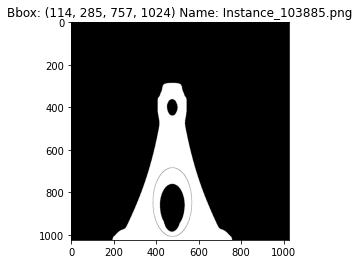

In [160]:
#test Syn Data
masks_syn = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Getriebeflansch/SegmentationMasks_1024'
masks_syn_save = masks_syn+'_binarized'
if not os.path.exists(masks_syn_save):
    try:
        os.mkdir(masks_syn_save)
    except FileExistsError:
        print('Folder already exists')
        pass
path = os.path.join(masks_syn, '*.png')
files = list(glob.glob(path))
files.sort(reverse=True)

for file in files:
    image = binarize(file, threshold1=10)
    plt.imshow(image)
    bbox = image.getbbox()
    plt.title(f'Bbox: {bbox} Name: {file[-19:]}')
    image.save(os.path.join(masks_syn_save,file[-19:]))

In [137]:
def loadpolygon():
    return

Since True is regarded as 1 and False is regarded as 0, when multiplied by 255 which is the Max value of uint8, True becomes 255 (white) and False becomes 0 (black)

In [158]:
path= '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Getriebeflansch/SegmentationMasks_1024_binarized/Instance_103885.png'

img = cv2.imread(path)
img_contour = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cv2.imwrite(os.path.join(path, 'test'),img_contour)

error: OpenCV(4.5.2) /tmp/pip-req-build-wu1ri_rx/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [10]:
def calculatescore(ground_truth, prediction_gan):
    """
    Compute feature consitency score of two segmentation masks.
    
    IoU(A,B) = |A & B| / (| A U B|)
    Dice(A,B) = 2*|A & B| / (|A| + |B|)

    Args:
        y_true: true masks, one-hot encoded.
        y_pred: predicted masks, either softmax outputs, or one-hot encoded.
        metric_name: metric to be computed, either 'iou' or 'dice'.
        metric_type: one of 'standard' (default), 'soft', 'naive'.
          In the standard version, y_pred is one-hot encoded and the mean
          is taken only over classes that are present (in y_true or y_pred).
          The 'soft' version of the metrics are computed without one-hot
          encoding y_pred.
          
    Returns:
        IoU of ground truth and GAN transformed syntetic Image, as a float.

    Inputs are B*W*H*N tensors, with
        B = batch size,
        W = width,
        H = height,
        N = number of classes
    """
    
    # check image shape to be the same
    assert ground_truth.shape == prediction_gan.shape, 'Input masks should be same shape, instead are {}, {}'.format(ground_truth.shape, prediction_gan.shape)
    #print('Ground truth shape: '+str(ground_truth.shape))
    #print('Predicted GAN image shape: '+str(prediction_gan.shape))
    
    intersection = np.logical_and(ground_truth, prediction_gan)
    union = np.logical_or(ground_truth, prediction_gan)
    mask_sum = np.sum(np.abs(union)) + np.sum(np.abs(intersection))
    iou_score = np.sum(intersection) / np.sum(union)
    dice_score = 2*np.sum(intersection) / np.sum(mask_sum) 
    print('IoU is: '+str(iou_score))
    print('Dice/F1 Score is: '+str(dice_score))
    return iou_score, dice_score

## 6. Calculate mean IoU
Translate image mask to white RGB(255,255,255), fill convex hull, and compare masks to calculate 'Feature Consistency Score' 

In [11]:
path_syn = masks_syn_save
path_gan = masks_gan_save
path_syn = os.path.join(path_syn, '*.png')
path_gan = os.path.join(path_gan, '*.png')
files_syn = list(glob.glob(path_syn))
files_gan = list(glob.glob(path_gan))
files_syn.sort(reverse=True)
files_gan.sort(reverse=True)

combined_list = zip(files_syn, files_gan)
z = list(combined_list)

In [12]:
iou_list = []
dice_list = []
for syn, gan in zip(files_syn, files_gan):
    img_syn = np.array(Image.open(syn))
    img_gan = np.array(Image.open(gan))
    print(f'Image name: {syn[-9:]}')
    iou, dice = calculatescore(img_syn, img_gan)
    print('\n')
    iou_list.append(iou)
    dice_list.append(dice)
    
mean_iou = np.mean(iou_list)
mean_dice = np.mean(dice_list)
print(f'Mean IoU is: {mean_iou}')
print(f'{iou_list}\n')
print(f'Mean Dice score is: {mean_dice}')
print(dice_list)

Image name: 91996.png
IoU is: 0.9747476025404216
Dice/F1 Score is: 0.9872123417559325


Image name: 91932.png
IoU is: 0.9774139682211779
Dice/F1 Score is: 0.9885779952292236


Image name: 91901.png
IoU is: 0.9787934316568521
Dice/F1 Score is: 0.989283081293942


Image name: 91870.png
IoU is: 0.9663214285714286
Dice/F1 Score is: 0.9828722959841618


Image name: 91839.png
IoU is: 0.9803605404882454
Dice/F1 Score is: 0.9900828868732596


Image name: 91808.png
IoU is: 0.9772992034255849
Dice/F1 Score is: 0.9885192910940909


Image name: 91777.png
IoU is: 0.9738508325855021
Dice/F1 Score is: 0.9867522069131001


Image name: 91710.png
IoU is: 0.9746275887126075
Dice/F1 Score is: 0.9871507865926584


Image name: 91676.png
IoU is: 0.9825576683039116
Dice/F1 Score is: 0.9912021062615493


Image name: 91609.png
IoU is: 0.9812840995418863
Dice/F1 Score is: 0.9905536513100563


Image name: 91576.png
IoU is: 0.9820756440708934
Dice/F1 Score is: 0.9909567750440177


Image name: 91539.png
IoU is: 0.9

In [14]:
import sys
base_dir = input_dir
prefix = 'batch4'
score_name = prefix+'_score.txt'
path = os.path.join(base_dir,score_name)

if not os.path.exists(path):
    try:
        os.mknod(path)
    except FileExistsError:
        print('Folder already exists')
        pass 

original_stdout = sys.stdout             # Save a reference to the original standard output

with open(path, 'w') as f:
    sys.stdout = f                       # Change the standard output to the file we created.
    iou_list = []
    dice_list = []
    print(f'Consistency Metrics for {prefix}:\n')
    for syn, gan in zip(files_syn, files_gan):
        img_syn = np.array(Image.open(syn))
        img_gan = np.array(Image.open(gan))
        print(f'Image name: {syn[-9:]}')
        iou, dice = calculatescore(img_syn, img_gan)
        print('\n')
        iou_list.append(iou)
        dice_list.append(dice)

    mean_iou = np.mean(iou_list)
    mean_dice = np.mean(dice_list)
    print(f'Mean IoU is: {mean_iou}')
    print(f'{iou_list}\n')
    print(f'Mean Dice score is: {mean_dice}')
    print(dice_list)
    sys.stdout = original_stdout         # Reset the standard output to its original value
f.close()

In [ ]:
#overlapping of 2 masks
#Image.blend()